In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from scipy.stats import boxcox 

## 1.PROBLEM STATEMENT

## 2.DATA GATHERING

In [62]:
df = pd.read_csv(r"C:\velocity\Practice\MACHINE LEARNING ALGO\LOGISTIC REGRESSION\TITANIC\artifacts\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
df.drop('PassengerId',axis=1,inplace=True)

In [64]:
df

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
survived = df['Survived']

In [66]:
df.drop('Survived',axis=1,inplace=True)

In [67]:
df.insert(df.shape[1],'Survived',survived)

In [47]:
df

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## 3.EDA

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Gender    891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### 3.1 Pclass

In [68]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot: >

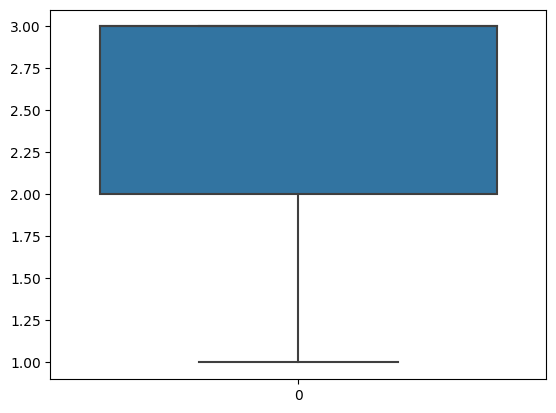

In [69]:
sns.boxplot(df['Pclass'])

### 3.2 Name

In [70]:
df.drop('Name',axis=1,inplace=True)

### 3.3 Gender

In [71]:
df['Gender']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Gender, Length: 891, dtype: object

In [15]:
df['Gender'].isna().sum()

0

In [72]:
df['Gender'].replace({'male': 1, 'female': 0},inplace=True)

In [73]:
df

,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,3,1,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,211536,13.0000,NaN,S,0
887,1,0,19.0,0,0,112053,30.0000,B42,S,1
888,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,1,1,26.0,0,0,111369,30.0000,C148,C,1


### 3.4 Age

In [74]:
df['Age'].isna().sum()

177

<AxesSubplot: xlabel='Age', ylabel='Density'>

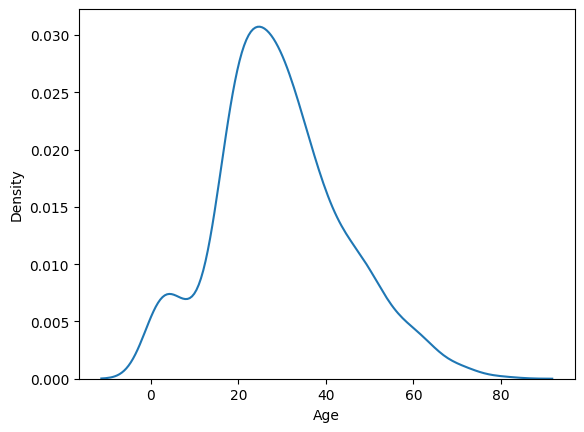

In [75]:
sns.kdeplot(df['Age'])

<AxesSubplot: >

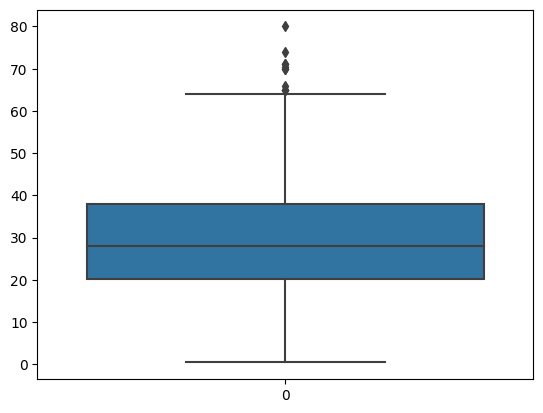

In [76]:
sns.boxplot(df['Age'])

In [58]:
df['Age'].median()

28.0

In [77]:
df['Age'] = df['Age'].fillna(U_T)

<AxesSubplot: >

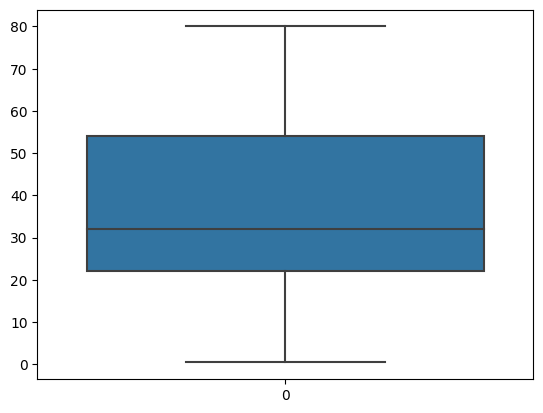

In [78]:
sns.boxplot(df['Age'])

In [24]:
df['Age'].isna().sum()

0

In [25]:
df.describe()

,Pclass,Gender,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.386083
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.487123
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [28]:
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

U_T = q3 + 1.5 * q2
L_T = q1 - 1.5 * q2

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Gender    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   Survived  891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [80]:
df['Age'].skew()

-0.018499125374938013